## Spectral Clustering , Relaxed version and custome method of Argmax

In [56]:
from google.colab import files
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import random
import math
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import SpectralClustering

In [57]:
df = pd.read_csv('/content/cm_dataset_2 - cm_dataset.csv')
df.loc[999] = df.columns[0], df.columns[1]

df.columns = ['x', 'y']
df.describe()

,x,y
count,1000.000,1000.000
unique,989.000,987.000
top,-10.386,-10.476
freq,2.000,2.000


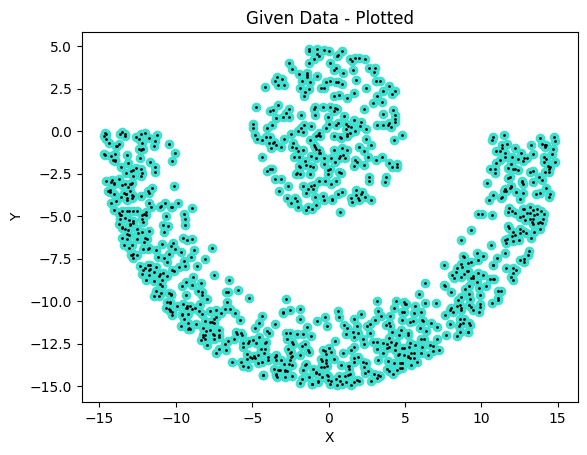

In [58]:
plt.scatter(df['x'],df['y'], c = 'turquoise')
plt.scatter(df['x'],df['y'], c = 'k', s =1)

plt.title("Given Data - Plotted")
plt.xlabel("X")
plt.ylabel('Y')

plt.show()

In [59]:
k =  2 # K-means Cluster allocations
n = 1000 #data points

In [60]:
def compute_mean(x, z):
  μ = np.zeros((k,2))
  count = np.zeros((k,1))
  for i in range(len(x)):
    μ[int(z[i][0])-1] += x[i]
    count[(int)(z[i][0])-1] += 1
  for j in range(k):
    μ[j] = μ[j]/count[j]
  return μ

In [61]:
def best_cluster(x,z,mean):
  new_z = np.zeros((1000,1))
  for i in range(n):
    new_z[i] = np.argmin([np.linalg.norm(x[i]-mu) for mu in mean]) + 1
  return new_z

In [62]:
def errr(x,z,mean):         # error of current clustering from ideal k = n clustering
  e = 0
  for i in range(n):
    e += np.linalg.norm(x[i]-mean[int(z[i][0])-1])**2
  return e

In [63]:
def kmeans(x):
  z = np.zeros((1000,1))
  re_z = np.zeros((1000,1))
  err = []

  mean = np.zeros(k)                             # Generate k random means
  mean_re = random.sample([x_i for x_i in x], k)

  flag = np.array_equal(mean, mean_re)

  while(flag):
    mean = mean_re
    z = best_cluster(x, z, mean)
    mean_re = compute_mean(x,z)
    err.append(errr(x,z,mean_re))

  #plt.show()
  #print(mean)

  plt.plot(err)
  plt.ylabel('Error')
  plt.xlabel('Iteration')
  return z,mean

In [64]:
# UncCentered Datapoints
"""
df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])
x = df.to_numpy()
x =  x - np.mean(x, axis =0)"""

"\ndf['x'] = pd.to_numeric(df['x'])\ndf['y'] = pd.to_numeric(df['y'])\nx = df.to_numpy()\nx =  x - np.mean(x, axis =0)"

In [65]:
def kernelb(Map, σ):
  n = Map.shape[1]
  #print(n)
  rbf = np.zeros((n,n))
  one = (1/n)*np.ones((n,n))

  for i in range(n):
    for j in range(i,n):     #symmetric
      xval = Map[:,i]
      yval = Map[:,j]
      rbf[i][j] = (np.linalg.norm(xval - yval))**2
      rbf[j][i] = rbf[i][j]

  K  = np.exp(-rbf/(σ))
  K = K - one.dot(K) - K.dot(one) + one.dot(K).dot(one)
  return K

In [76]:
print(x.shape)

(1000, 2)


In [81]:
K = kernelb(x.T, 5)
eig_val, eig_vect = np.linalg.eig(K)
print(K)
idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eigvect = eig_vect[:,idx]
H = eig_vect[:,:k]
H = H.real
for i in range(H.shape[0]):
  H[i] = H[i]/np.linalg.norm(H[i])

[[ 0.97534312 -0.01316117 -0.01384728 ... -0.04755962 -0.05035308
   0.01189219]
 [-0.01316117  0.99833016  0.37410092 ... -0.0360661  -0.03885956
  -0.03203527]
 [-0.01384728  0.37410092  0.99693853 ... -0.03676191 -0.03955538
  -0.03287679]
 ...
 [-0.04755962 -0.0360661  -0.03676191 ...  0.92953764 -0.07325582
  -0.06661611]
 [-0.05035308 -0.03885956 -0.03955538 ... -0.07325582  0.92395071
  -0.06940958]
 [ 0.01189219 -0.03203527 -0.03287679 ... -0.06661611 -0.06940958
   0.93723013]]


In [78]:
H

array([[-0.81430221,  0.58044114],
       [-0.81389071,  0.58101799],
       [-0.81398575,  0.58088485],
       ...,
       [-0.81430277,  0.58044035],
       [-0.79101149,  0.6118013 ],
       [-0.81430285,  0.58044024]])

In [98]:
def Spectral_clusterR():
  z = np.zeros(1000)
  for i in range(1000):
    if H[i,0]<-0.5:
      z[i] = 1

    else:
      z[i] = 0

  for i in range(n):
    plt.scatter(x[i][0], x[i][1], c = color[int(z[i])+2])
  plt.xlim(-18,18)
  plt.ylim(-12,12)
  plt.xlabel('X')
  plt.ylabel('Y')

#### Spectral Clustering

<ipython-input-99-66214fbf2a62>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(x[i][0], x[i][1], c = color[int(kerv[i])+2])


Text(0, 0.5, 'Y')

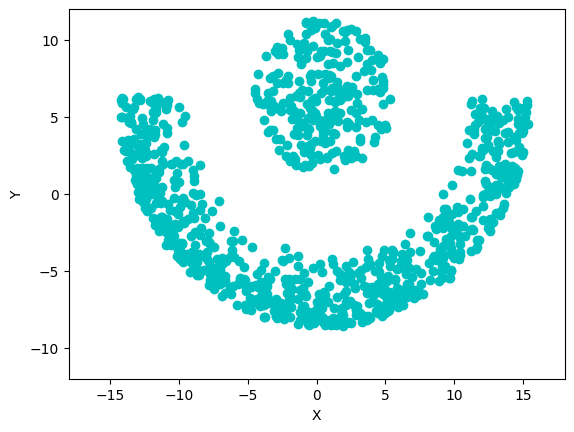

In [99]:
kerv, kerm = kmeans(H.T)

#print(z_kernel2)
color = ['r', 'b', 'c', 'g', 'y']
for i in range(n):
  plt.scatter(x[i][0], x[i][1], c = color[int(kerv[i])+2])
plt.xlim(-18,18)
plt.ylim(-12,12)
plt.xlabel('X')
plt.ylabel('Y')

#### Relaxed version of Spectral Clustering

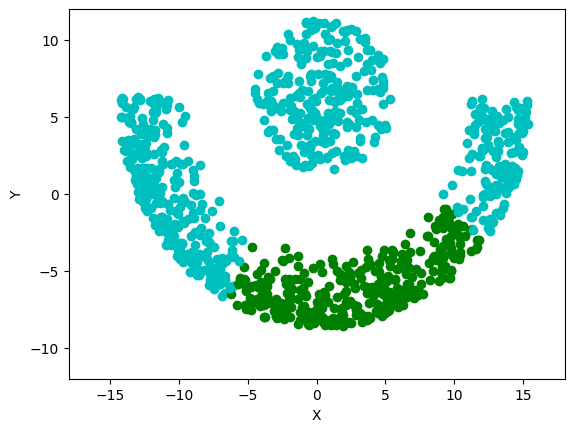

In [100]:
Spectral_clusterR()

#### Custom Argmax function

Text(0, 0.5, 'Y')

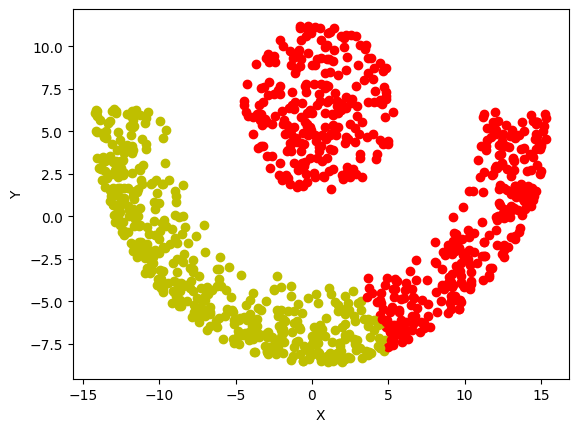

In [97]:
kerv = np.argmax(H, axis = 1)
color = ['r', 'b', 'c', 'g', 'y']
for i in range(n):
  plt.scatter(x[i][0], x[i][1], c = color[(int)(kerv[i])-1])
plt.xlabel('X')
plt.ylabel('Y')